In [1]:
import pandas as pd

### Reading the Multisource Temperature file _ after Preprocess


In [2]:
# Read the Global Temperature multisource Excel file and the NOAA sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_noaa = pd.read_excel(file_path, sheet_name='NOAA', usecols="A:B")

# Display the first few rows of the dataframe
df_noaa
# Adjustment = Anerage anomaly 1950-1980
df_base_noaa = df_noaa[(df_noaa['Year'] >= 1850) & (df_noaa['Year'] <= 1900)]
Adjustment = df_base_noaa['Anomaly(1901-2000 baseline)'].mean()

df_noaa['Anomaly(1850-1900 baseline)'] = df_noaa['Anomaly(1901-2000 baseline)'] - Adjustment
# df_noaa
Adjustment
anomaly_df = pd.DataFrame(df_noaa['Anomaly(1850-1900 baseline)'])

# Display the DataFrame in a tabular format
# anomaly_df.to_excel('temp.xlsx', index=False)


### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 30-year rolling Linear Regression (1995-2024) and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [3]:
from scipy.stats import linregress
from datetime import datetime

# Compute the 31-year centered average starting at 1865
# df_noaa['31yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()
# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# Initialize lists to store the slopes and intercepts
slopes = []
intercepts = []
start_year = 1995
index0_year = 1849
# Define the rolling window size
window_size = 30
new_values = {}
# Loop through the dataframe starting from 1995
for start_year in range(1995, df_noaa['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window = df_noaa[(df_noaa['Year'] >= start_year) & (df_noaa['Year'] <= end_year)]
    # print(f"Start Year: {start_year}, End Year: {end_year}")
    # print(df_window.index)
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window.index+1, df_window['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes.append(slope)
    intercepts.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression = pd.DataFrame({
    'Start Year': range(1995, df_noaa['Year'].max() - window_size + 2),
    'End Year': range(1995 + window_size - 1, df_noaa['Year'].max() + 1),
    'Slope': slopes,
    'Intercept': intercepts
})

# Display the dataframe
df_rolling_regression
# For Method2: Only working with 15 year slope and intercept values from "df_rolling_regression" for the ending year-2024
#   The absolute Global Mean Temperature for year 2025 is calculated by using the slope and intercept values for the year 2024

# Extract the slope and intercept values for the year 2024
slope_2024 = df_rolling_regression[df_rolling_regression['End Year'] == 2024]['Slope'].values[0]
intercept_2024 = df_rolling_regression[df_rolling_regression['End Year'] == 2024]['Intercept'].values[0]
print(f"Slope for 2024: {slope_2024}")
print(f"Intercept for 2024: {intercept_2024}")
# Calculate the absolute Global Mean Temperature for the year 2025



Slope for 2024: 0.02336596218020022
Intercept for 2024: -2.8501781063927236


In [22]:
df_rolling_regression

,Start Year,End Year,Slope,Intercept
0,1995,2024,0.023366,-2.850178


In [ ]:
# slope_2024 = round(slope_2024,9 )
# intercept_2024 = round(intercept_2024,9)

# new = (2025-1849)*slope_2024 + intercept_2024
# new = round(new, 9)
# print(slope_2024, intercept_2024,new)

In [4]:
# Initialize a list to store the new anomaly values
new_anomalies = []

# Compute the anomaly values for the years 2025 to 2100
for year in range(2025, 2101):
    anomaly = slope_2024 * (year - index0_year) + intercept_2024
    new_anomalies.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies = pd.DataFrame(new_anomalies)

# Append the new anomaly values to the existing df_noaa DataFrame
df_noaa = pd.concat([df_noaa, df_new_anomalies], ignore_index=True)

# Compute the 11-year centered average
df_noaa['11yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_noaa['21yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards
df_noaa['31yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()
# Display the updated DataFrame

# df_noaa.to_excel('temp.xlsx', index=False)
df_noaa.tail(50)
# df_new_anomalies
# print(slope_2024, intercept_2024,new)

,Year,Anomaly(1901-2000 baseline),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,1.869746,1.869746,1.869746,1.869746
202,2052,NaN,1.893112,1.893112,1.893112,1.893112
203,2053,NaN,1.916478,1.916478,1.916478,1.916478
204,2054,NaN,1.939844,1.939844,1.939844,1.939844
205,2055,NaN,1.963210,1.963210,1.963210,1.963210
206,2056,NaN,1.986576,1.986576,1.986576,1.986576
207,2057,NaN,2.009942,2.009942,2.009942,2.009942
208,2058,NaN,2.033308,2.033308,2.033308,2.033308
209,2059,NaN,2.056674,2.056674,2.056674,2.056674
210,2060,NaN,2.080040,2.080040,2.080040,2.080040


### HadCRUT Global Temperature Process

In [6]:
# Read the Global Temperature multisource Excel file and the CRUT sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_crut = pd.read_excel(file_path, sheet_name='HadCRUT_5.0.2.0', usecols="A:B")

# Display the first few rows of the dataframe
df_crut
# Adjustment = Anerage anomaly 1950-1980
df_base_crut = df_crut[(df_crut['Time'] >= 1850) & (df_crut['Time'] <= 1900)]
Adjustment = df_base_crut['Anomaly (1961-1990 baseline deg C)'].mean()
# Adjustment
df_crut['Anomaly(1850-1900 baseline)'] = df_crut['Anomaly (1961-1990 baseline deg C)'] - Adjustment
df_crut
# Adjustment
anomaly_df = pd.DataFrame(df_crut['Anomaly(1850-1900 baseline)'])

# Display the DataFrame in a tabular format
# anomaly_df.to_excel('temp.xlsx', index=False)
# df_crut

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 30-year rolling Linear Regression (1995-2024) and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [ ]:
# Compute the 31-year centered average starting at 1865
# df_crut['31yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_crut.to_excel('temp.xlsx', index=False)

In [7]:
# Initialize lists to store the slopes and intercepts for df_crut
slopes_crut = []
intercepts_crut = []
# Initialize a list to store the new anomaly values for df_crut
new_anomalies_crut = []
# Loop through the dataframe starting from 1996
for start_year in range(1995, df_crut['Time'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_crut = df_crut[(df_crut['Time'] >= start_year) & (df_crut['Time'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_crut.index+1, df_window_crut['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_crut.append(slope)
    intercepts_crut.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_crut = pd.DataFrame({
    'Start Year': range(1995, df_crut['Time'].max() - window_size + 2),
    'End Year': range(1995 + window_size - 1, df_crut['Time'].max() + 1),
    'Slope': slopes_crut,
    'Intercept': intercepts_crut
})

# Display the dataframe
df_rolling_regression_crut
# Extract the slope and intercept values for the year 2024
slope_2024_crut = df_rolling_regression_crut[df_rolling_regression_crut['End Year'] == 2024]['Slope'].values[0]
intercept_2024_crut = df_rolling_regression_crut[df_rolling_regression_crut['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# df_crut.to_excel('temp.xlsx', index=False)
# print(df_rolling_regression_crut)
# print(slope_2024_crut, intercept_2024_crut)

# Anomaly computation for CRUT for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_crut
for year in range(2025, 2101):
    anomaly = slope_2024_crut * (year - index0_year) + intercept_2024_crut
    new_anomalies_crut.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_crut = pd.DataFrame(new_anomalies_crut)

# Append the new anomaly values to the existing df_crut DataFrame
df_crut = pd.concat([df_crut, df_new_anomalies_crut.rename(columns={'Year': 'Time'})], ignore_index=True)
# Compute the 11-year centered average
df_crut['11yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_crut['21yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_crut
df_crut['31yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_crut.to_excel('temp_crut.xlsx', index=False)
# print(df_crut.tail(50)) 
df_crut.tail(50)

,Time,Anomaly (1961-1990 baseline deg C),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,1.939052,1.939052,1.939052,1.939052
202,2052,NaN,1.961685,1.961685,1.961685,1.961685
203,2053,NaN,1.984317,1.984317,1.984317,1.984317
204,2054,NaN,2.006949,2.006949,2.006949,2.006949
205,2055,NaN,2.029581,2.029581,2.029581,2.029581
206,2056,NaN,2.052213,2.052213,2.052213,2.052213
207,2057,NaN,2.074845,2.074845,2.074845,2.074845
208,2058,NaN,2.097477,2.097477,2.097477,2.097477
209,2059,NaN,2.120109,2.120109,2.120109,2.120109
210,2060,NaN,2.142741,2.142741,2.142741,2.142741


### Berkeley Global Temperature Process

In [8]:
# Read the Global Temperature multisource Excel file and the Berkeley sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_berkeley = pd.read_excel(file_path, sheet_name='Berkeley-earth-temperature', usecols="A:B")

# Display the first few rows of the dataframe
df_berkeley
# Adjustment = Anerage anomaly 1950-1980
df_base_berkeley = df_berkeley[(df_berkeley['Year'] >= 1850) & (df_berkeley['Year'] <= 1900)]
Adjustment = df_base_berkeley['Annual_Anomaly(1951-Dec 1980 baseline)'].mean()
# Adjustment
df_berkeley['Anomaly(1850-1900 baseline)'] = df_berkeley['Annual_Anomaly(1951-Dec 1980 baseline)'] - Adjustment
df_berkeley
# Adjustment
anomaly_df = pd.DataFrame(df_berkeley['Anomaly(1850-1900 baseline)'])
# anomaly_df.to_excel('temp.xlsx', index=False)
Adjustment

-0.3062156862745098

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 30-year rolling Linear Regression (1995-2024) and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [ ]:
# Compute the 31-year centered average starting at 1865
# df_berkeley['31yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_berkeley.to_excel('temp.xlsx', index=False)

In [9]:
# Initialize lists to store the slopes and intercepts for df_berkeley
slopes_berkeley = []
intercepts_berkeley = []
# Initialize a list to store the new anomaly values for df_berkeley
new_anomalies_berkeley = []
# Loop through the dataframe starting from 1996
for start_year in range(1995, df_berkeley['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_berkeley = df_berkeley[(df_berkeley['Year'] >= start_year) & (df_berkeley['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_berkeley.index+1, df_window_berkeley['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_berkeley.append(slope)
    intercepts_berkeley.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_berkeley = pd.DataFrame({
    'Start Year': range(1995, df_berkeley['Year'].max() - window_size + 2),
    'End Year': range(1995 + window_size - 1, df_berkeley['Year'].max() + 1),
    'Slope': slopes_berkeley,
    'Intercept': intercepts_berkeley
})

# Display the dataframe
df_rolling_regression_berkeley
# Extract the slope and intercept values for the year 2024
slope_2024_berkeley = df_rolling_regression_berkeley[df_rolling_regression_berkeley['End Year'] == 2024]['Slope'].values[0]
intercept_2024_berkeley = df_rolling_regression_berkeley[df_rolling_regression_berkeley['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# df_berkeley.to_excel('temp.xlsx', index=False)
# print(df_rolling_regression_berkeley)
print(slope_2024_berkeley, intercept_2024_berkeley)

# Anomaly computation for Berkeley for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_berkeley
for year in range(2025, 2101):
    anomaly = slope_2024_berkeley * (year - index0_year) + intercept_2024_berkeley
    new_anomalies_berkeley.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_berkeley = pd.DataFrame(new_anomalies_berkeley)

# Append the new anomaly values to the existing df_berkeley DataFrame
df_berkeley = pd.concat([df_berkeley, df_new_anomalies_berkeley], ignore_index=True)
# Compute the 11-year centered average
df_berkeley['11yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_berkeley['21yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_berkeley
df_berkeley['31yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_berkeley.to_excel('temp.xlsx', index=False)
df_berkeley.tail(50)

0.02309632925472747 -2.6416118257759162


,Year,Annual_Anomaly(1951-Dec 1980 baseline),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,2.023847,2.023847,2.023847,2.023847
202,2052,NaN,2.046943,2.046943,2.046943,2.046943
203,2053,NaN,2.070039,2.070039,2.070039,2.070039
204,2054,NaN,2.093136,2.093136,2.093136,2.093136
205,2055,NaN,2.116232,2.116232,2.116232,2.116232
206,2056,NaN,2.139328,2.139328,2.139328,2.139328
207,2057,NaN,2.162425,2.162425,2.162425,2.162425
208,2058,NaN,2.185521,2.185521,2.185521,2.185521
209,2059,NaN,2.208617,2.208617,2.208617,2.208617
210,2060,NaN,2.231714,2.231714,2.231714,2.231714


In [10]:
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_NASA = pd.read_excel(file_path, sheet_name='NASA', usecols="A:B")
df_NASA_1880to1900_avg = df_NASA[(df_NASA['Year'] >= 1880) & (df_NASA['Year'] <= 1900)]['Anomaly(1951-1980 baseline)'].mean()

Adjustment = df_NASA_1880to1900_avg - 0.03 # As suggested by Gavin Schmidt and Ken Kunkel to bring NASA data to 1850-1900 baseline
df_NASA['Anomaly(1850-1900 baseline)'] = df_NASA['Anomaly(1951-1980 baseline)'] - Adjustment
df_NASA
anomaly_df = pd.DataFrame(df_NASA['Anomaly(1850-1900 baseline)'])
# # df_NASA.to_excel('temp.xlsx', index=False)
df_NASA

,Year,Anomaly(1951-1980 baseline),Anomaly(1850-1900 baseline)
0,1850,NaN,NaN
1,1851,NaN,NaN
2,1852,NaN,NaN
3,1853,NaN,NaN
4,1854,NaN,NaN
...,...,...,...
170,2020,1.01,1.25619
171,2021,0.84,1.08619
172,2022,0.89,1.13619
173,2023,1.17,1.41619


In [11]:
# Initialize lists to store the slopes and intercepts for df_NASA
slopes_nasa = []
intercepts_nasa = []
# Initialize a list to store the new anomaly values for df_NASA
new_anomalies_nasa = []

# Loop through the dataframe starting from 1995
for start_year in range(1995, df_NASA['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_nasa = df_NASA[(df_NASA['Year'] >= start_year) & (df_NASA['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_nasa.index+1, df_window_nasa['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_nasa.append(slope)
    intercepts_nasa.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_nasa = pd.DataFrame({
    'Start Year': range(1995, df_NASA['Year'].max() - window_size + 2),
    'End Year': range(1995 + window_size - 1, df_NASA['Year'].max() + 1),
    'Slope': slopes_nasa,
    'Intercept': intercepts_nasa
})

# Display the dataframe
df_rolling_regression_nasa

# Extract the slope and intercept values for the year 2024
slope_2024_nasa = df_rolling_regression_nasa[df_rolling_regression_nasa['End Year'] == 2024]['Slope'].values[0]
intercept_2024_nasa = df_rolling_regression_nasa[df_rolling_regression_nasa['End Year'] == 2024]['Intercept'].values[0]

# Compute the anomaly values for the years 2025 to 2100 for df_NASA
for year in range(2025, 2101):
    anomaly = slope_2024_nasa * (year - index0_year) + intercept_2024_nasa
    new_anomalies_nasa.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_nasa = pd.DataFrame(new_anomalies_nasa)

# Append the new anomaly values to the existing df_NASA DataFrame
df_NASA = pd.concat([df_NASA, df_new_anomalies_nasa], ignore_index=True)

# Compute the 11-year centered average
df_NASA['11yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_NASA['21yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_NASA
df_NASA['31yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
df_NASA.tail(50)

,Year,Anomaly(1951-1980 baseline),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,1.947149,1.947149,1.947149,1.947149
202,2052,NaN,1.971035,1.971035,1.971035,1.971035
203,2053,NaN,1.994922,1.994922,1.994922,1.994922
204,2054,NaN,2.018808,2.018808,2.018808,2.018808
205,2055,NaN,2.042695,2.042695,2.042695,2.042695
206,2056,NaN,2.066581,2.066581,2.066581,2.066581
207,2057,NaN,2.090468,2.090468,2.090468,2.090468
208,2058,NaN,2.114354,2.114354,2.114354,2.114354
209,2059,NaN,2.138241,2.138241,2.138241,2.138241
210,2060,NaN,2.162127,2.162127,2.162127,2.162127


### DCENT Global Temparature Processs

In [12]:
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_DCENT = pd.read_excel(file_path, sheet_name='DCENT', usecols="A:B")
df_base_DCENT = df_DCENT[(df_DCENT['Year'] >= 1850) & (df_DCENT['Year'] <= 1900)]
Adjustment = df_base_DCENT['GMST (1850ー1900 baseline °C)'].mean()
df_DCENT['Anomaly(1850-1900 baseline)'] = df_DCENT['GMST (1850ー1900 baseline °C)'] - Adjustment
df_DCENT
# Adjustment
anomaly_df = pd.DataFrame(df_DCENT['Anomaly(1850-1900 baseline)'])
# df_DCENT.to_excel('temp.xlsx', index=False)
Adjustment

-0.8384313725490196

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 30-year rolling Linear Regression (1994-2023) and pick the slope , intercept for 2023
### computation of new anomaly 2024 onwards using slope and intercept of 2023 (Assuming a linear trend)
### create new df including missing values of 2024 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [ ]:
# Compute the 31-year centered average starting at 1865
# df_DCENT['31yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_DCENT.to_excel('temp.xlsx', index=False)

In [13]:
# Initialize lists to store the slopes and intercepts for df_DCENT
slopes_dcent = []
intercepts_dcent = []
# Initialize a list to store the new anomaly values for df_DCENT
new_anomalies_dcent = []

start_year = 1994 # for DCENT data as it has data till 2023
index0_year = 1849
# Loop through the dataframe starting from 1995
for start_year in range(1994, df_DCENT['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_dcent = df_DCENT[(df_DCENT['Year'] >= start_year) & (df_DCENT['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_dcent.index+1, df_window_dcent['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_dcent.append(slope)
    intercepts_dcent.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_dcent = pd.DataFrame({
    'Start Year': range(1994, df_DCENT['Year'].max() - window_size + 2),
    'End Year': range(1994 + window_size - 1, df_DCENT['Year'].max() + 1),
    'Slope': slopes_dcent,
    'Intercept': intercepts_dcent
})

# Display the dataframe
df_rolling_regression_dcent
# Extract the slope and intercept values for the year 2024
slope_2023_dcent = df_rolling_regression_dcent[df_rolling_regression_dcent['End Year'] == 2023]['Slope'].values[0]
intercept_2023_dcent = df_rolling_regression_dcent[df_rolling_regression_dcent['End Year'] == 2023]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# Anomaly computation for DCENT for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_DCENT
for year in range(2024, 2101):
    anomaly = slope_2023_dcent * (year - index0_year) + intercept_2023_dcent
    new_anomalies_dcent.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_dcent = pd.DataFrame(new_anomalies_dcent)

# Append the new anomaly values to the existing df_DCENT DataFrame
df_DCENT = pd.concat([df_DCENT, df_new_anomalies_dcent], ignore_index=True)
# Compute the 11-year centered average
df_DCENT['11yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_DCENT['21yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_DCENT
df_DCENT['31yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_DCENT.to_excel('temp_dcent.xlsx', index=False)
df_DCENT.tail(50)

,Year,GMST (1850ー1900 baseline °C),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,1.935321,1.935321,1.935321,1.935321
202,2052,NaN,1.955679,1.955679,1.955679,1.955679
203,2053,NaN,1.976037,1.976037,1.976037,1.976037
204,2054,NaN,1.996395,1.996395,1.996395,1.996395
205,2055,NaN,2.016753,2.016753,2.016753,2.016753
206,2056,NaN,2.037111,2.037111,2.037111,2.037111
207,2057,NaN,2.057470,2.057470,2.057470,2.057470
208,2058,NaN,2.077828,2.077828,2.077828,2.077828
209,2059,NaN,2.098186,2.098186,2.098186,2.098186
210,2060,NaN,2.118544,2.118544,2.118544,2.118544


### Try for 2nd order trend


In [17]:
import numpy as np

# Initialize lists to store the coefficients for the quadratic regression
coefficients_dcent = []

# Loop through the dataframe starting from 1994
for start_year in range(1994, df_DCENT['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_dcent = df_DCENT[(df_DCENT['Year'] >= start_year) & (df_DCENT['Year'] <= end_year)]
    print(df_window_dcent)
    # Perform quadratic regression
    coeffs = np.polyfit(df_window_dcent.index + 1, df_window_dcent['Anomaly(1850-1900 baseline)'], 2)
    
    # Append the results to the list
    coefficients_dcent.append(coeffs)

# Create a new dataframe to store the results
df_quadratic_regression_dcent = pd.DataFrame({
    'Start Year': range(1994, df_DCENT['Year'].max() - window_size + 2),
    'End Year': range(1994 + window_size - 1, df_DCENT['Year'].max() + 1),
    'a': [coeff[0] for coeff in coefficients_dcent],
    'b': [coeff[1] for coeff in coefficients_dcent],
    'c': [coeff[2] for coeff in coefficients_dcent]
})

# Display the dataframe
df_quadratic_regression_dcent

# Extract the coefficients for the year 2023
coeffs_2023_dcent = df_quadratic_regression_dcent[df_quadratic_regression_dcent['End Year'] == 2023].iloc[0]
a_2023_dcent = coeffs_2023_dcent['a']
b_2023_dcent = coeffs_2023_dcent['b']
c_2023_dcent = coeffs_2023_dcent['c']

# Compute the anomaly values for the years 2024 to 2100 using the quadratic trend
new_anomalies_dcent = []
for year in range(2024, 2101):
    anomaly = a_2023_dcent * (year - index0_year)**2 + b_2023_dcent * (year - index0_year) + c_2023_dcent
    new_anomalies_dcent.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_dcent = pd.DataFrame(new_anomalies_dcent)

# Append the new anomaly values to the existing df_DCENT DataFrame
df_DCENT = pd.concat([df_DCENT, df_new_anomalies_dcent], ignore_index=True)

# Compute the 11-year centered average
df_DCENT['11yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_DCENT['21yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_DCENT
df_DCENT['31yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_DCENT.tail(50)

     Year  GMST (1850ー1900 baseline °C)  Anomaly(1850-1900 baseline)  \
144  1994                         -0.06                     0.778431   
145  1995                          0.05                     0.888431   
146  1996                         -0.13                     0.708431   
147  1997                          0.07                     0.908431   
148  1998                          0.22                     1.058431   
149  1999                         -0.03                     0.808431   
150  2000                         -0.03                     0.808431   
151  2001                          0.11                     0.948431   
152  2002                          0.16                     0.998431   
153  2003                          0.17                     1.008431   
154  2004                          0.11                     0.948431   
155  2005                          0.21                     1.048431   
156  2006                          0.19                     1.02

In [15]:
df_DCENT['Year'].max()

2100

In [13]:
df_quadratic_regression_dcent


,Start Year,End Year,a,b,c
0,1994,2023,0.000472,-0.130258,9.799252


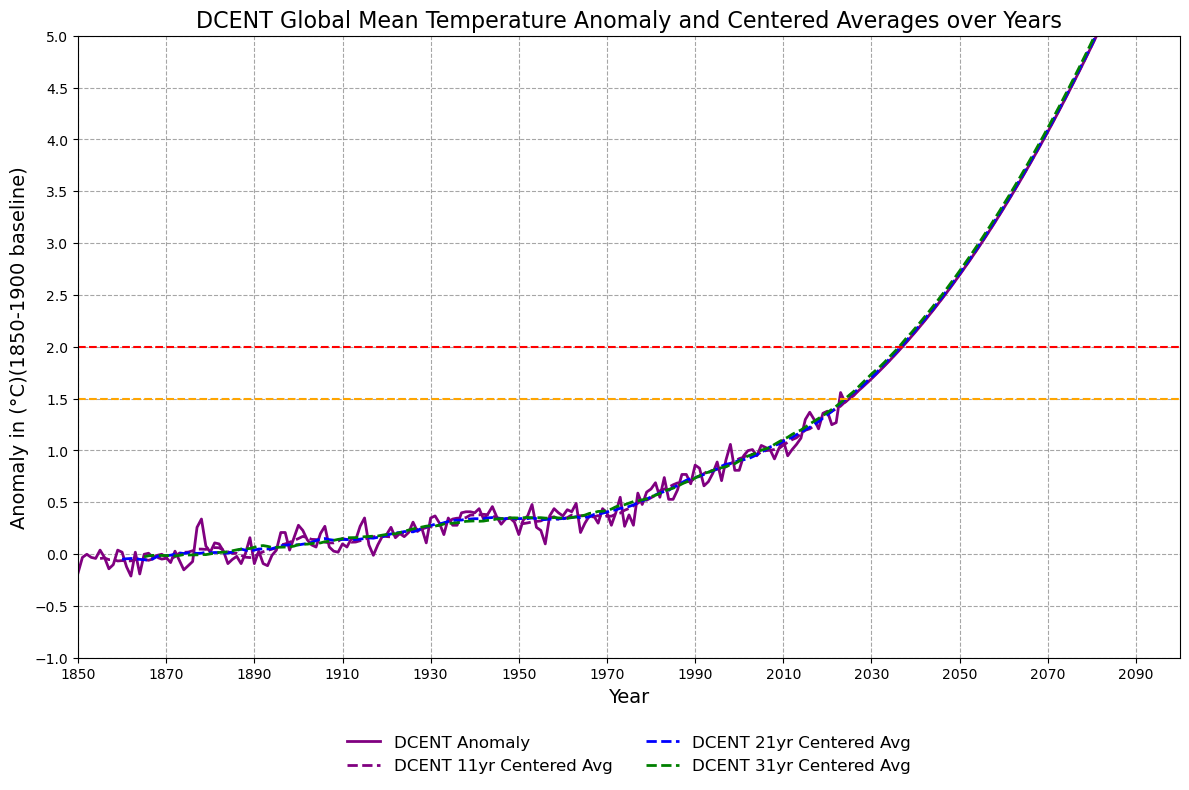

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['11yr_centered_avg'], label='DCENT 11yr Centered Avg', linestyle='--', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['21yr_centered_avg'], label='DCENT 21yr Centered Avg', linestyle='--', color='blue', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['31yr_centered_avg'], label='DCENT 31yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2100])
plt.ylim([-1, 5])

# Set x-axis ticks and labels at 20-year intervals
plt.xticks(range(1850, 2101, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-2, 11)])

# Add title and labels
plt.title('DCENT Global Mean Temperature Anomaly and Centered Averages over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
current_datetime = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
# file_name = f'GlobalTemprature_MultiSource_Method2_with30yrTrend{current_datetime}.xlsx'
# file_name = f'GlobalTemprature_MultiSource_Method2_30-yrTrend_11_21_31yrCenteredAvg.xlsx'
file_name = f'GlobalTemperature_linregress_30yrTrend.xlsx'
with pd.ExcelWriter(file_name) as writer:
    df_noaa.to_excel(writer, sheet_name='NOAA', index=False)
    df_crut.to_excel(writer, sheet_name='HadCRUT', index=False)
    df_berkeley.to_excel(writer, sheet_name='Berkeley-Earth-Temperature', index=False)
    df_NASA.to_excel(writer, sheet_name='NASA', index=False)
    df_DCENT.to_excel(writer, sheet_name='DCENT_GlobalTemperature', index=False)

### Composite Plotting

In [ ]:
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['11yr_centered_avg'], label='NOAA 11yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['11yr_centered_avg'], label='CRUT 11yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['11yr_centered_avg'], label='Berkeley 11yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['11yr_centered_avg'], label='NASA 11yr Centered Avg', linestyle='--', color='orange', linewidth=2)
# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['11yr_centered_avg'], label='DCENT 11yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 11-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)
# Add annotation
plt.annotate('Estimated using a 30-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['21yr_centered_avg'], label='NOAA 21yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['21yr_centered_avg'], label='CRUT 21yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['21yr_centered_avg'], label='Berkeley 21yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['21yr_centered_avg'], label='NASA 21yr Centered Avg', linestyle='--', color='orange', linewidth=2)
# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['21yr_centered_avg'], label='DCENT 21yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 21-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)
# Add annotation
plt.annotate('Estimated using a 30-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['31yr_centered_avg'], label='NOAA 31yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['31yr_centered_avg'], label='CRUT 31yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['31yr_centered_avg'], label='Berkeley 31yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['31yr_centered_avg'], label='NASA 31yr Centered Avg', linestyle='--', color='orange', linewidth=2)

# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['31yr_centered_avg'], label='DCENT 31yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 31-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)

# Add annotation
plt.annotate('Estimated using a 30-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

# Show plot
plt.tight_layout()
plt.show()